<a href="https://colab.research.google.com/github/benedictlai/thinkful-challenges/blob/master/Benedict_Lai_Final_Capstone_Project_Thinkful_November_30%2C_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import sklearn
import scipy
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score 
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
%matplotlib inline
warnings.filterwarnings("ignore")

# Introduction to my Final Project

What is the problem you are attempting to solve?

I am attempting to solve customer trends with Telco Company. For example, I want to solve if a customer is going to churn based on the tenure of the customer, the preferences for contracts and if they are a senior citizen. I mention senior citizens because they are used to paying bills through the mail and they may not be benefitting from getting a discount to keep them from staying with the company.

How is your solution valuable?

My solution is valuable because it will help determine if tenure customers are more likely to churn based on customer behavior such as the preferences for contracts, how long they have been a customer with Telco, and if they are a senior citizen. These factors may impact on customer retention. The results of my research will not only benefit Telco Company but it will also benefit other companies so it can inspire other customers to give true feedback to the company especially with the preferences of contracts.

What is your data source and how will you access it?

The data source is from https://www.kaggle.com/blastchar/telco-customer-churn. They are 7,043 customers in the dataset. I will not use the whole data set due to the null values (Total Charges group has null values) potentially impacting my project in a negative way.

What techniques from the course do you anticipate using?

I anticipate using Logistic Regression, Gradient Boosting Classifier, Random Forest Classifier, Support Vector Classifier, and Feature Importances.

What do you anticipate to be the biggest challenge you’ll face?

Getting the best accuracy rate on churn, cleaning messy data, handling the class imbalance are the biggest hurdles I will face.

# Introducing Data

In [40]:
telco = pd.read_csv('https://raw.githubusercontent.com/benedictlai/thinkful-challenges/master/telco(7).csv')
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,MCGroup,TCGroup
0,6260-XLACS,Male,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.70,117.8,No,0-14,$0-$19.99,$0-$999.99
1,0661-KQHNK,Female,0,Yes,Yes,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.00,105.5,No,0-14,$0-$19.99,$0-$999.99
2,0895-LNKRC,Male,0,Yes,Yes,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.45,113.5,No,0-14,$0-$19.99,$0-$999.99
3,1015-JPFYW,Male,0,No,Yes,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.45,136.75,No,0-14,$0-$19.99,$0-$999.99
4,1226-JZNKR,Female,0,Yes,Yes,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.80,160.05,No,0-14,$0-$19.99,$0-$999.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No,70-75,$90-$119.99,$8500-$8999.99
7039,8879-XUAHX,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No,70-75,$90-$119.99,$8500-$8999.99
7040,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.1,No,70-75,$90-$119.99,$8500-$8999.99
7041,9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.4,No,70-75,$90-$119.99,$8500-$8999.99


# Data Information

Q1: Gender? - Categorical

Classes: Male or Female

Q2: SeniorCitizen? - Numerical 

Classes: 0 (No) or 1(Yes)

Q3: Partner - Categorical

Classes: Yes or No 

Q4: Dependents - Categorical

Classes: Yes or No 

Q5: tenure - Numerical

Classes: 1-72

Q6: PhoneService - Categorical

Classes: Yes or No 

Q7: MultipleLines - Categorical

Classes: Yes, No, or No Phone Service

Q8: InternetService - Categorical

Classes: DSL, Fiber Optic, or No

Q9. OnlineSecurity - Categorical

Classes: Yes, No, or No Internet Service

Q10. OnlineBackup - Categorical

Classes: Yes, No, or No Internet Service

Q11. DeviceProtection - Categorical

Classes: Yes, No, or No Internet Service

Q12. TechSupport - Categorical 

Classes: Yes, No, or No Internet Service

Q13. StreamingTV - Categorical 

Classes: Yes, No, or No Internet Service

Q14. StreamingMovies - Categorical

Classes: Yes, No, or No Internet Service

Q15. Contract - Categorical

Classes: Month-to-Month, One Year, Two Year 

Q16. PaperlessBilling	- Categorical 

Classes: Yes or No  

Q17. PaymentMethod - Categorical

Classes: Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check

Q18. MonthlyCharges - Continuous

Classes: 18.25-118.75

Q19: TotalCharges - Continuous

Classes: 18.8-8684.8 

Q20. Churn - Categorical

Classes: Yes or No

I added three categories below to cluster them into groups in Excel since the data was all over the place for Tenure, MonthlyCharges, and TotalCharges.

Q21. TenureGroup - Continuous

Classes: 0-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74

Q22. MCGroup - Continuous

Classes: 0-19.99, 20-29.99, 30-39.99, 40-49.99, 50-59.99, 60-69.99, 70-79.99, 80-89.99, 90-119.99

Q23. TCGroup - Continuous

Classes: 0-999.99, 1000-1499.99, 1500-1999.99, 2000-2499.99, 2500-2999.99, 3000-3499.99, 3500-3999.99, 4000-4499.99, 4500-4999.99, 5000-5499.99, 5500-5999.99, 6000-6499.99, 6500-6999.99, 7000-7499.99, 7500-7999.99, 8000-8499.99, 8500-8999.99

I added this category to target variables, which is the main purpose of the project.

I got this data from Kaggle, which is from https://www.kaggle.com/blastchar/telco-customer-churn.



In [41]:
telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
TenureGroup          object
MCGroup              object
TCGroup              object
dtype: object

In [42]:
telco.isnull().sum().sort_values(ascending=False) 

TCGroup             11
MCGroup              0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
TenureGroup          0
customerID           0
dtype: int64

Because I have null Values in TCGroup (Total Charges Group), I will drop the null values below.

In [0]:
telco.dropna(subset=['TCGroup'], inplace=True)

# Data Analysis

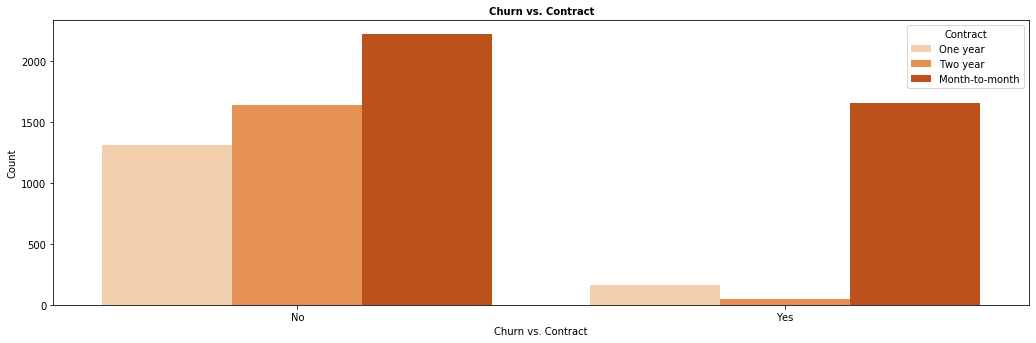

In [44]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="Contract", palette="Oranges",data=telco)
plt.title("Churn vs. Contract",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. Contract")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

More customers are more likely to not recommend the company with a month-to-month contract based on those who voted "Yes" to churn. A reason those types of customers only can to month-to-month contract is that they have a limited budget that prevents them from doing yearly contracts. Those types of customers may experience late fees for not paying on time, which inflates their decision to not recommend the company when the company is not at fault.

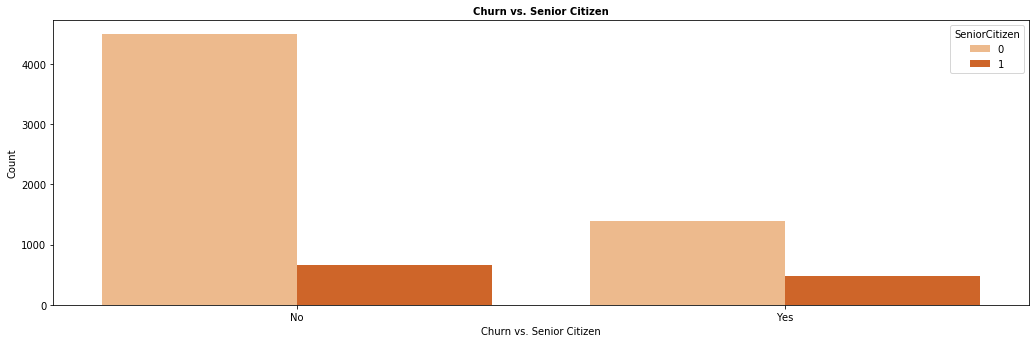

In [45]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="SeniorCitizen", palette="Oranges",data=telco)
plt.title("Churn vs. Senior Citizen",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. Senior Citizen")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

Senior citizens are less likely to churn because there is an implication they receive a discount on services. Another implication may not be the discount, but their loyalty to the company (which causes them to have more incentives for them being with the company long). I predicted senior citizens were going to churn from the company because companies now emphasize on paperless billing. In the graph below, senior citizens did not sign up for paperless billing, which meant they are used to paying bills by mail.

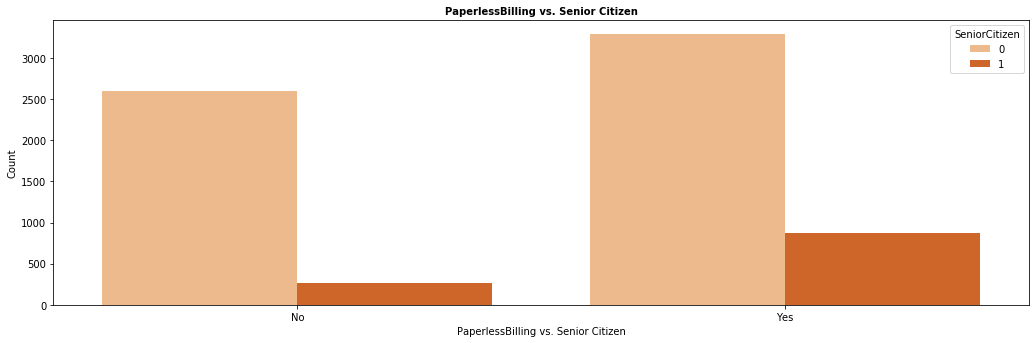

In [46]:
plt.figure(figsize=(10,5))
sns.countplot("PaperlessBilling", hue="SeniorCitizen", palette="Oranges",data=telco)
plt.title("PaperlessBilling vs. Senior Citizen",fontsize=10,fontweight="bold")
plt.xlabel("PaperlessBilling vs. Senior Citizen")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

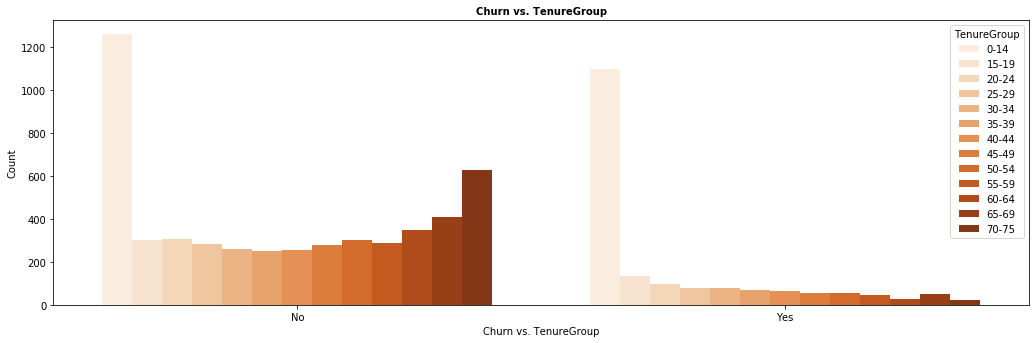

In [47]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="TenureGroup", palette="Oranges",data=telco)
plt.title("Churn vs. TenureGroup",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. TenureGroup")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

Customers who have been with the company longer are less likely to churn because there is an implication they receive a special discount for staying with the company for a while. Those customers who have stayed with the company for less than 15 years did not recommend the company and did not show enough patience to stay longer with the company.




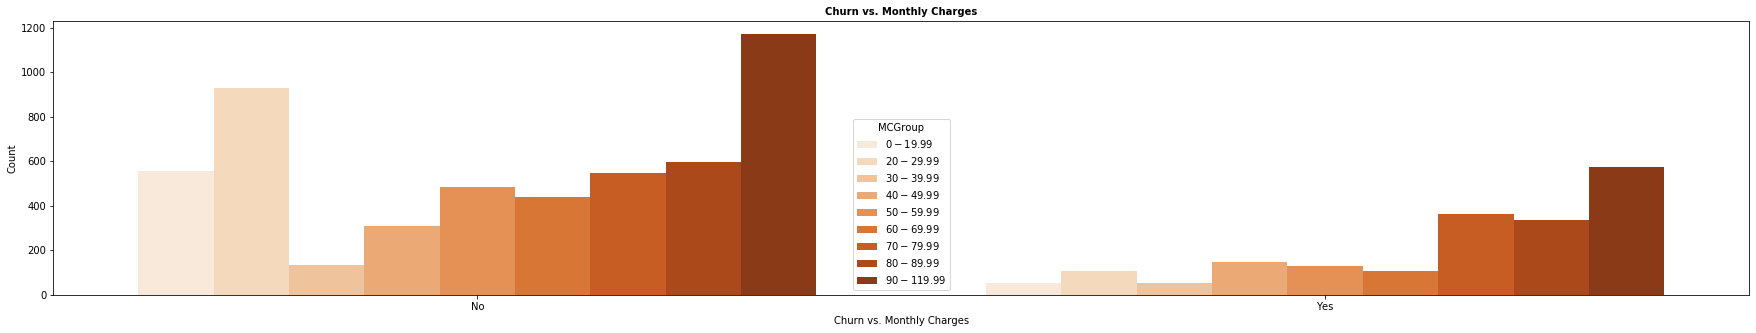

In [48]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="MCGroup", palette="Oranges",data=telco)
plt.title("Churn vs. Monthly Charges",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. Monthly Charges")
plt.ylabel("Count")
plt.subplots_adjust(top=2.35, bottom=1.59, right=2.48)
plt.show()

Customers who paid `$70/month` are most likely to churn due to the expensive services offered. Those who paid less than $30 are satisfied with the services, which implicates they still recommended the service.

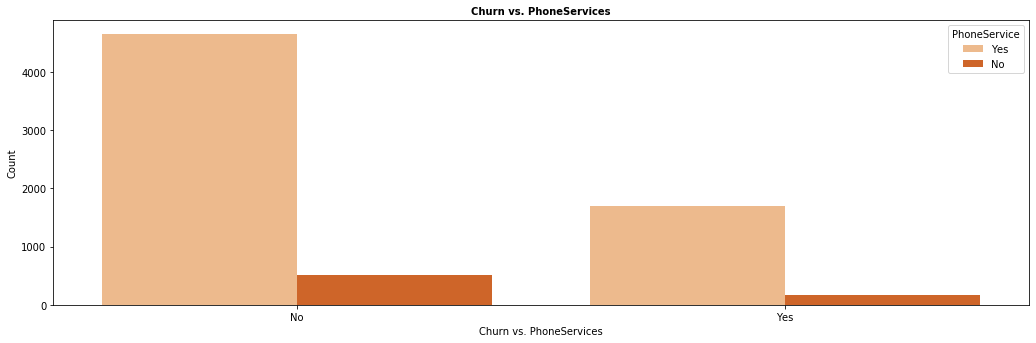

In [49]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="PhoneService", palette="Oranges",data=telco)
plt.title("Churn vs. PhoneServices",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. PhoneServices")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

More customers (who churned) voted yes to having phone service. Those churned customers that had phone service were unlikely satisfied with their services based on quality, and/or price.

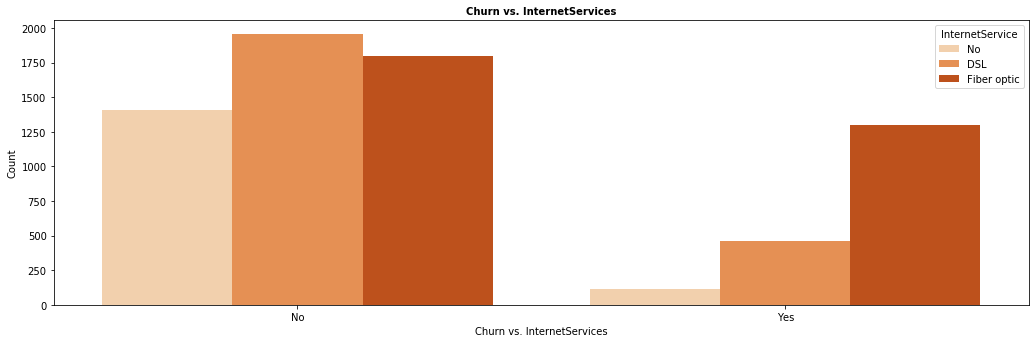

In [50]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="InternetService", palette="Oranges",data=telco)
plt.title("Churn vs. InternetServices",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. InternetServices")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

Those churned customers are the ones who use Fiber Optic. Because Fiber Optic is faster than DSL, it is an implication that it is more expensive.

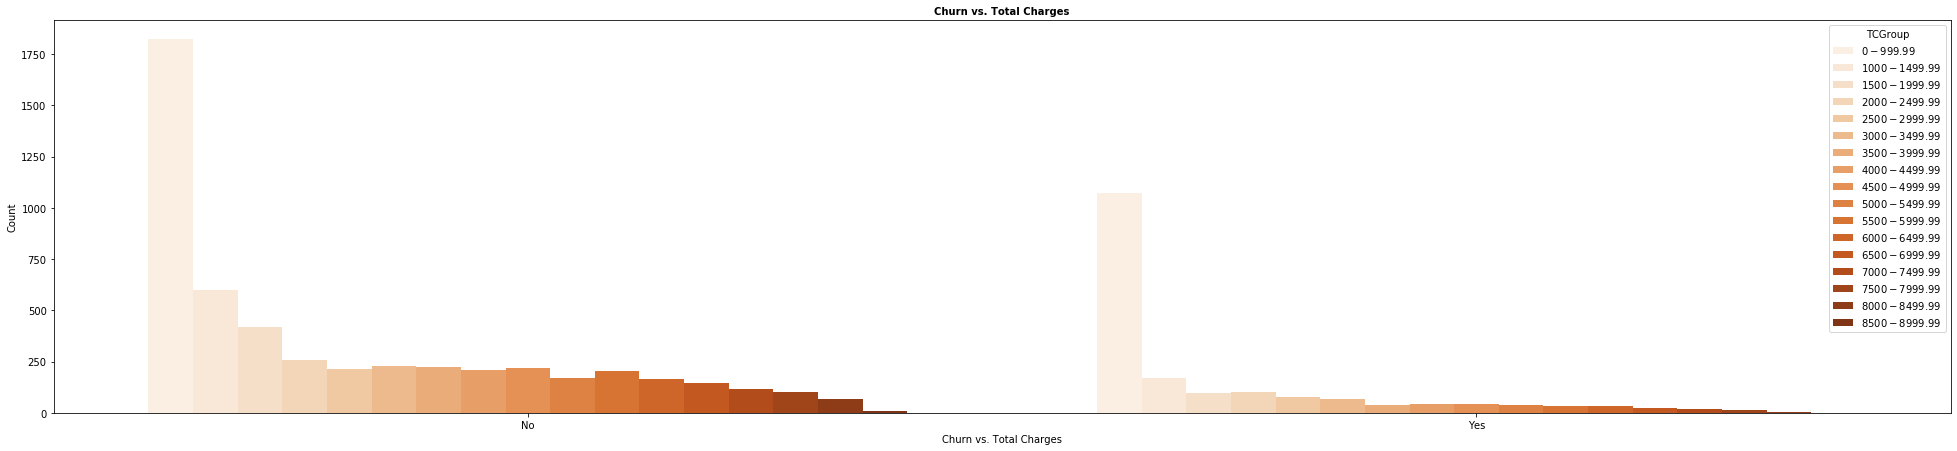

In [51]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="TCGroup", palette="Oranges",data=telco)
plt.title("Churn vs. Total Charges",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. Total Charges")
plt.ylabel("Count")
plt.subplots_adjust(top=4.88, bottom=3.79, right=2.76)
plt.show()

Those churned customers are theones that paid a total of $1,000 month. The more they paid in total, they less of a chance they would churn the company.

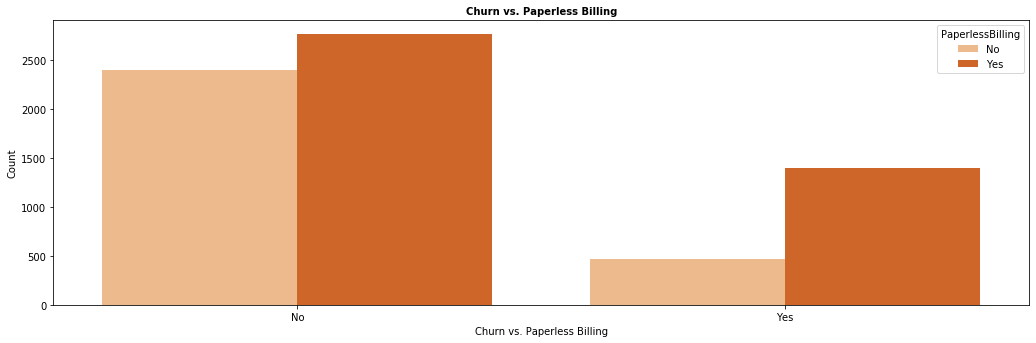

In [52]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="PaperlessBilling", palette="Oranges",data=telco)
plt.title("Churn vs. Paperless Billing",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. Paperless Billing")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

Those who did churn actually did vote for paperless billing as their preference. What I learned from it is that not choosing paperless billing does not always play in a factor of a customer churning.

---



In [0]:
lb = LabelEncoder()

for col in telco.columns:
  telco[col]=lb.fit_transform(telco[col])

In [54]:
telco.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,MCGroup,TCGroup
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,3515.500000,0.504693,0.162400,0.482509,0.298493,31.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,683.446815,3261.890216,0.265785,4.538680,4.819824,3.396473
std,2030.107879,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,478.099359,1885.766048,0.441782,4.427444,2.823563,4.249920
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1757.750000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,200.750000,1609.000000,0.000000,0.000000,2.000000,0.000000
50%,3515.500000,1.000000,0.000000,0.000000,0.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,721.000000,3253.500000,0.000000,3.000000,6.000000,1.000000
75%,5273.250000,1.000000,0.000000,1.000000,1.000000,54.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1089.250000,4903.250000,1.000000,9.000000,7.000000,6.000000
max,7031.000000,1.000000,1.000000,1.000000,1.000000,71.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1583.000000,6529.000000,1.000000,12.000000,8.000000,16.000000


In [0]:
X= telco[['Contract', 'SeniorCitizen', 'TenureGroup','MCGroup','PhoneService','InternetService','TCGroup','PaperlessBilling']]
y= telco['Churn']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

# Random Forest Classifier

In [57]:
import timeit

%timeit pass

rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

print('\n')
print("The Random Forest Classifier results are below:")
print("Accuracy:",accuracy_score(y_test,pred_rfc )*100)
print("F1:",f1_score(y_test,pred_rfc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_rfc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_rfc, average="macro")*100) 
print("Cross Validation:", cross_val_score(rfc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_rfc))


100000000 loops, best of 3: 7.39 ns per loop


The Random Forest Classifier results are below:
Accuracy: 78.34123222748815
F1: 71.37321693055408
Precision: 73.62026466009341
Recall: 70.1157013288196
Cross Validation: [77.64920828 78.41463415 74.81707317]


Here is the confusion matrix below:
 [[1347  164]
 [ 293  306]]


# Support Vector Classifier

In [58]:
%timeit pass

svc = SVC(random_state = 42)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print('\n')
print("The Support Vector Classifier) results are below:")
print("Accuracy:",accuracy_score(y_test,pred_svc )*100)
print("F1:",f1_score(y_test, pred_svc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_svc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_svc, average="macro")*100) 
print("Cross Validation:", cross_val_score(svc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_svc))

100000000 loops, best of 3: 7.35 ns per loop


The Support Vector Classifier) results are below:
Accuracy: 78.72037914691943
F1: 70.05602307297222
Precision: 75.28482294044025
Recall: 68.21400989294976
Cross Validation: [79.71985384 79.32926829 79.02439024]


Here is the confusion matrix below:
 [[1398  113]
 [ 336  263]]


# Logistic Regression

In [59]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print("\n")
print("The Logistic Regression results are below:")
print("Accuracy:",lr_acc_score*100)
print("F1:",f1_score(y_test, lr_predict, average="macro")*100)
print("Precision:",precision_score(y_test,lr_predict, average="macro")*100)
print("Recall:",recall_score(y_test, lr_predict, average="macro")*100) 
print("Cross Validation:", cross_val_score(lr, X_train, y_train, cv=3)*100)
print("\n")


print("Here is the confusion matrix below:\n",lr_conf_matrix)



The Logistic Regression results are below:
Accuracy: 78.86255924170617
F1: 71.32117745726183
Precision: 74.75487035272876
Recall: 69.7239718966864
Cross Validation: [79.47624848 78.90243902 77.98780488]


Here is the confusion matrix below:
 [[1373  138]
 [ 308  291]]


# Gradient Boosting Classifier

In [60]:
%timeit pass

gbc = ensemble.GradientBoostingClassifier(random_state = 42)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

print("\n")
print("The Gradient Boosting Classifier results are below:")
print("Accuracy:",accuracy_score(y_test,pred_gbc )*100)
print("F1:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_gbc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("Cross Validation:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_gbc))

100000000 loops, best of 3: 7.37 ns per loop


The Gradient Boosting Classifier results are below:
Accuracy: 79.81042654028437
F1: 72.60722331119626
Precision: 76.21781351704017
Recall: 70.88960312190294
Cross Validation: [80.02436054 79.3902439  78.96341463]


Here is the confusion matrix below:
 [[1383  128]
 [ 298  301]]


*Describe your model in detail: why you chose it, why it works, what problem it solves, how it will run in a production like environment. What would you need to do to maintain it going forward?*

I chose Random Forest because it is faster to produce results. Also, my data is not all balanced so this feature is efficient to use. 

I chose Support Vector Classifier due to its flexibility for datasets.

I chose Logistic Regression because it is straightforward to use and easy to train. 

I chose Gradient Boosting because of the decision trees that can predict which variables has the most popularity with each of the questions. Also, it handles null values, which may be the most useful model for my dataset. 


Gradient Boosting, Random Forest, Support Vector Classifier, and Logistic Regression are the models I chose for this based on the lessons I read. I checked on all those 4 models to determine which model would fit accurately with my model.

Random Forest Classifier has the lowest accuracy score of 78.34% and the lowest overall for cross validation scores. Support Vector Machine ranks only 3rd in accuracy score with 78.72%, but it ranks 2nd in cross validation scores. Logistic Regression ranks 2nd in accuracy score with 78.86%, but it only ranks 3rd for cross validation scores. Gradient Boosting has the highest accuracy score of 79.81% and ranks the highest in cross validation scores. Based on Support Vector Machine and Logisitc Regression, the cross validation scores is inconsistent with the four models I used in terms of ranking. 

The models work because of the consistent scores (mainly in the 78-79 range) among the models and higher than expected scores. The problem that it helped determine if tenure customers are more likely to churn based on customer behavior such as the preferences for contracts, how long they have been a customer with Telco, and how much they pay monthly and in total charges. These factors may impact on customer retention. The results of my research will not only benefit Telco Company but it will also benefit other companies so it can inspire other customers to give true feedback to the company especially with the preferences of contracts.

What I would need to do to maintain it going forward is to test out one more model (which is Feature Importances) to determine which variables are the most relevant. Also, I need to do model tuning after choosing the best prediction model.

For *model tuning*, I will be presenting *4 different version of models* by changing a few variables to see which version works based on the improvement for **Gradient Boosting Models**, which is the best prediction model.

*What do the metrics you present (ie, Precision, Recall, Accuracy) mean in terms of the goals you set out for this project?*

The best model is **Gradient Boosting** because they scored higher in all of these metrics than any of the prediction models. I will describe these metrics below:

**76.21%** of precision means it is the ratio of accurately predicted positive observations out of the overall observations (True Positive divided by True Positive + False Positive). 

For Recall (sensitivity), **70.89%** is the ratio of the accurately predicted positive observations out of the overall observations in the actual class labeled (True Positive divided by True Positive + False Negative). The recall score is lower because there are more false negative observations in the dataset. 

**79.81%** of accuracy means (True Positive + True Negative)/(True Positive + False Positive + False Negative + True Negative)). This is the highest out of the three because there are more true negative observations.

# Should accuracy or recall be treated higher than sensitivity? Bring up these questions and an answer in your conclusions.


Accuracy takes precedence over recall and sensitivity because it helps me choose the best model. Yes, there are some inconsistencies with recall score and confusion matrix not correlating well with accuracy scores. For example, Random Forest Classifier ranked 2nd in the recall score category and has a lower false negative score than Gradient Boosting, the best model. However, RFC has the lowest true positive and accuracy score.  

Despite the cons of accuracy I listed, I still choose accuracy for these reasons:

1.   The accuracy scores are consistent (meaning none went way above 79 or way below 78) for all the other models.
2.   Accuracy has the full formula and true story in every model. Therefore, all categories are expected to rank higher than every scoring category than the other prediction models.


# Model Tuning - Gradient Boosting Classifier


In [61]:
%timeit pass

gbc = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=42, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

print("\n")
print("The Gradient Boosting Classifier results are below:")
print("Accuracy:",accuracy_score(y_test,pred_gbc )*100)
print("F1:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_gbc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("Cross Validation:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_gbc))

100000000 loops, best of 3: 7.46 ns per loop


The Gradient Boosting Classifier results are below:
Accuracy: 79.81042654028437
F1: 72.60722331119626
Precision: 76.21781351704017
Recall: 70.88960312190294
Cross Validation: [80.02436054 79.3902439  78.96341463]


Here is the confusion matrix below:
 [[1383  128]
 [ 298  301]]


# Version A - I will increase the max depth to 4 and decrease the estimators to 50.


In [62]:
%timeit pass

gbc = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=50, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=4, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=42, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

print("\n")
print("The Gradient Boosting Classifier for Version A results are below:")
print("Accuracy:",accuracy_score(y_test,pred_gbc )*100)
print("F1:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_gbc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("Cross Validation:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_gbc))

100000000 loops, best of 3: 7.4 ns per loop


The Gradient Boosting Classifier for Version A results are below:
Accuracy: 79.71563981042654
F1: 72.25785681284222
Precision: 76.24411988424617
Recall: 70.47074928542939
Cross Validation: [80.08526188 79.26829268 79.08536585]


Here is the confusion matrix below:
 [[1388  123]
 [ 305  294]]


For the accuracy, F1, precision and recall scores, they decreased by 0.0948, 0.3493, and 0.4189, respectively. However, the precision score trended up by 0.0263.

The cross validation scores went down in the second column (down by 0.1220), but it went up in the first and third columns by 0.069 and 0.1220, respectively.

Unfortunately, the downsides of the model is where false negatives went in the wrong direction (up by 7 to 305).

On the bright side, the true positives (up by 5 to 1388) went in the right direction. For the next model (Version B), I will test if increasing the estimators back to 100, which I hope will help my model better.



# Version B - I will keep the max depth at 4 and increase the estimators back to 100.



In [63]:
%timeit pass

gbc = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                          max_depth=4, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=42, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

print("\n")
print("The Gradient Boosting Classifier for Version B results are below:")
print("Accuracy:",accuracy_score(y_test,pred_gbc )*100)
print("F1:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_gbc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("cross validation:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_gbc))

100000000 loops, best of 3: 7.51 ns per loop


The Gradient Boosting Classifier for Version B results are below:
Accuracy: 79.81042654028437
F1: 72.92593623381178
Precision: 75.98649915720625
Recall: 71.34303919283076
cross validation: [79.90255786 79.3902439  78.7195122 ]


Here is the confusion matrix below:
 [[1374  137]
 [ 289  310]]


For the accuracy, F1, and recall scores, they improved by 0.0948, 0.6681, and 0.8723, respectively compared to Version A.

However, the precision score unusually went down by 0.2576. Additionally, the cross validation scores went down in the first and third column by 0.1827 and 0.3659, respectively. However, the second column went up by 0.1220.

Also, the true positive went in the wrong direction (went down by 14 to 1374). Despite this disappointment, the false negative did trim down by 16 from 305 to 289, which went in the right direction.

For the next model (Version C), I will test if increasing the estimators up to 150 will help my model better.


# Version C - I will keep the max depth at 4 and increase the estimators to 150.




In [64]:
%timeit pass

gbc = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=150, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                          max_depth=4, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=42, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

print("\n")
print("The Gradient Boosting Classifier results for Version C are below:")
print("Accuracy:",accuracy_score(y_test,pred_gbc )*100)
print("F1:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_gbc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("Cross Validation:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_gbc))

100000000 loops, best of 3: 7.49 ns per loop


The Gradient Boosting Classifier results for Version C are below:
Accuracy: 79.71563981042654
F1: 72.40569266270339
Precision: 76.127072787572
Recall: 70.67227642806398
Cross Validation: [79.6589525  78.84146341 78.90243902]


Here is the confusion matrix below:
 [[1384  127]
 [ 301  298]]


Despite increasing the estimators up to 150, the scores went down in most of the categories.

For the accuracy, F1, and recall scores, they decreased by 0.0948, 0.5202, and 0.6708, respectively compared to Version B. Also, the false negatives went in the wrong direction (going up 12 from 289 to 301). Additionally, the cross validation scores went down in the first two columns by 0.2436 and 0.5488, respectively. However, the third column went up by 0.1829.

Despite this disappointment in the model, the true positive did improved by 10 from 1374 to 1384 and the precision score went up by 0.1406.

An assumption of the model not meeting my high expectations is where I went over a certain limit where I cannot make the estimators too high. Increasing the estimators higher than 150 may cause the model to perform worse than the original model.

Therefore, I will test if increasing the estimators down to 125 and reducing the max depth back to 3 will help the next model (Version D) better.



# Version D - I will reduce the max depth back to 3 and decrease the estimators to 125.


In [65]:
%timeit pass

gbc = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=125, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                          max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=40, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

print("\n")
print("The Gradient Boosting Classifier results for Version D are below:")
print("Accuracy:",accuracy_score(y_test,pred_gbc )*100)
print("F1:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_gbc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("Cross Validation:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_gbc))

100000000 loops, best of 3: 7.56 ns per loop


The Gradient Boosting Classifier results for Version D are below:
Accuracy: 80.0
F1: 72.82856134980183
Precision: 76.53946824631493
Recall: 71.07234758128759
Cross Validation: [80.08526188 79.3902439  78.96341463]


Here is the confusion matrix below:
 [[1386  125]
 [ 297  302]]


This strategy paid off of decreasing the estimators to 125 and reducing the max depth back to 3, which caused the scores in all categories to go up vs. Version C. For example, the accuracy, F1, precision, and recall scores, improved by 0.2844, 0.4229, 0.4124, 0.40, respectively. 

Also, true positives (up 2 from 1384 to 1386) and false negatives (down 4 from 301 to 297) went in the right direction. Additionally, all the columns went up by 0.4263, 0.5488, and 0.0698 respectively.


This is the only model that changed in every category in the same way for the scores.


# Findings on Model Tuning


*Why did you choose not to decrease the max depth or increase it further?*

When I realized I went to far by increasing the estimators dramatically when it hurt Version C model, the models indicate changing the max depth dramatically (regardless of increasing and decreasing) would also hurt my model.

*What kind of inconsistences did you see for the models?*

Version D had lower true positives (1374 vs. 1386) and higher false negatives (297 vs. 289) than Version B even though Version D had a higher accuracy score. Also, Version B had the lowest number of false negatives and highest of true positives; yet, it had the lowest score in the precision category. Furthermore, the precision score did not trend the same way as the other category scores in Versions A-C compared to the original model. 

*Which version of the models are the best?*

Version D is the best for model tuning because it is the only model that reduced false negatives (down 4 to 297) and true positives (up 2 to 1386) at the same time. Also, it is the only model that has an accuracy score that improved vs. the original model. Additionally, Version D improved in every category vs. the original model and is the only model that matched (second column and third columns) or exceeded (first column by 0.0609) in cross-validation scores vs. the original model.



# Unit 5 Specialization


# Which gender of tenured customers are more likely to churn?

0 is Female and 1 is Male

In [66]:
telco.gender

0       1
1       0
2       1
3       1
4       0
       ..
7038    0
7039    1
7040    0
7041    1
7042    1
Name: gender, Length: 7032, dtype: int64

In [67]:
print('1 Year at Telco Company')
telco1 = telco.loc[telco['tenure'] == 1]
telco1 = telco1.groupby(telco1['gender'])['Churn'].mean()
print(telco1)
print(stats.kstest(telco1, 'norm'))
print('\n')

print('2 Years at Telco Company')
telco2 = telco.loc[telco['tenure'] == 2]
telco2 = telco2.groupby(telco2['gender'])['Churn'].mean()
print(telco2)
print(stats.kstest(telco2, 'norm'))
print('\n')

print('3 Years at Telco Company')
telco3 = telco.loc[telco['tenure'] == 3]
telco3= telco3.groupby(telco3['gender'])['Churn'].mean()
print(telco3)
print(stats.kstest(telco3, 'norm'))
print('\n')

print('4 Years at Telco Company')
telco4 = telco.loc[telco['tenure'] == 4]
telco4= telco4.groupby(telco4['gender'])['Churn'].mean()
print(telco4)
print(stats.kstest(telco4, 'norm'))
print('\n')

1 Year at Telco Company
gender
0    0.523077
1    0.509259
Name: Churn, dtype: float64
KstestResult(statistic=0.6947147446423894, pvalue=0.18639817427752306)


2 Years at Telco Company
gender
0    0.495050
1    0.444444
Name: Churn, dtype: float64
KstestResult(statistic=0.6716393567181147, pvalue=0.21564142411298706)


3 Years at Telco Company
gender
0    0.534091
1    0.409091
Name: Churn, dtype: float64
KstestResult(statistic=0.6587635262502591, pvalue=0.23288466203431518)


4 Years at Telco Company
gender
0    0.469697
1    0.492537
Name: Churn, dtype: float64
KstestResult(statistic=0.6807142334114626, pvalue=0.20388680149205993)




I chose tenured customers because they are relevant to the data set with churning. I broke down by each gender and it seems that more Telco female customers are more likely to churn. This indicates more females are likely to call out every mistake on a bill. Also, those type of customers are savvy, meaning they wanted a cheaper service since the service did not live up to quality.

Also, for the customers that were with Telco for only one year, new customers may not have seniority and get special treatment on certain services like the tenured customers do.

Because the p-values in all tenured customer groups are higher than 0.05 for tenure vs. churning, we cannot reject the null hypothesis. Therefore, the relationship between tenure and churning does not correlate well. However, as the tenured customers got younger, the p-value kept going lower.

# Which gender of senior citizens are more likely to churn?


In [68]:
telcosc1 = telco.loc[telco['SeniorCitizen'] == 1]
telcosc1 = telcosc1.groupby(telcosc1['gender'])['Churn'].mean()
print(telcosc1)
print(stats.kstest(telcosc1, 'norm'))


gender
0    0.422535
1    0.411150
Name: Churn, dtype: float64
KstestResult(statistic=0.6595186617539919, pvalue=0.2318550833875852)


I chose senior citizen because they are relevant to the data set with churning. With the increase of paying bills online electronically, I figured this type of demographic will likely churn since they have yet to transition into the new technology era.

I broke down by each gender and it seems more female senior citizens are likely to churn Telco Company. Similar to my previous question in Unit 5, this indicates more females are likely to call out every mistake on a bill. Also, those type of customers are savvy, meaning they wanted a cheaper service since the service did not live up to quality.

Because the p-value is higher than 0.05 for senior citizens vs. churning, we cannot reject the null hypothesis. Therefore, the relationship between senior citizens and churning do not correlate well.

# Feature Importances

In [69]:

rfr = ensemble.RandomForestRegressor()
rfr.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [70]:
rfr.score(X_test, y_test)

0.22308952388233882

In [71]:
print(cross_val_score(rfr, X_train, y_train, cv=5))

[0.13553548 0.19670624 0.20035754 0.0843747  0.08982843]


In [72]:
importances = rfr.feature_importances_ 
stdev = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature rankings:")
g = 1
for f in range(X.shape[1]):
    if importances[indices[f]] > 0.01:
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        g += 1
    else:
        continue
print(g)

Feature rankings:
1. feature 0 (0.338167)
2. feature 2 (0.185789)
3. feature 3 (0.155077)
4. feature 6 (0.130739)
5. feature 7 (0.063807)
6. feature 5 (0.058502)
7. feature 1 (0.055527)
8. feature 4 (0.012392)
9


In [0]:
feat = {}
for feature, importance in zip(X.columns, rfr.feature_importances_):
    feat[feature] = importance
importances = pd.DataFrame.from_dict(feat, orient='index').rename(columns={0: 'Feature Importances'})
importances = importances.sort_values(['Feature Importances'], ascending=[0])

In [74]:
imp = importances[:8]
imp

,Feature Importances
Contract,0.338167
TenureGroup,0.185789
MCGroup,0.155077
TCGroup,0.130739
PaperlessBilling,0.063807
InternetService,0.058502
SeniorCitizen,0.055527
PhoneService,0.012392


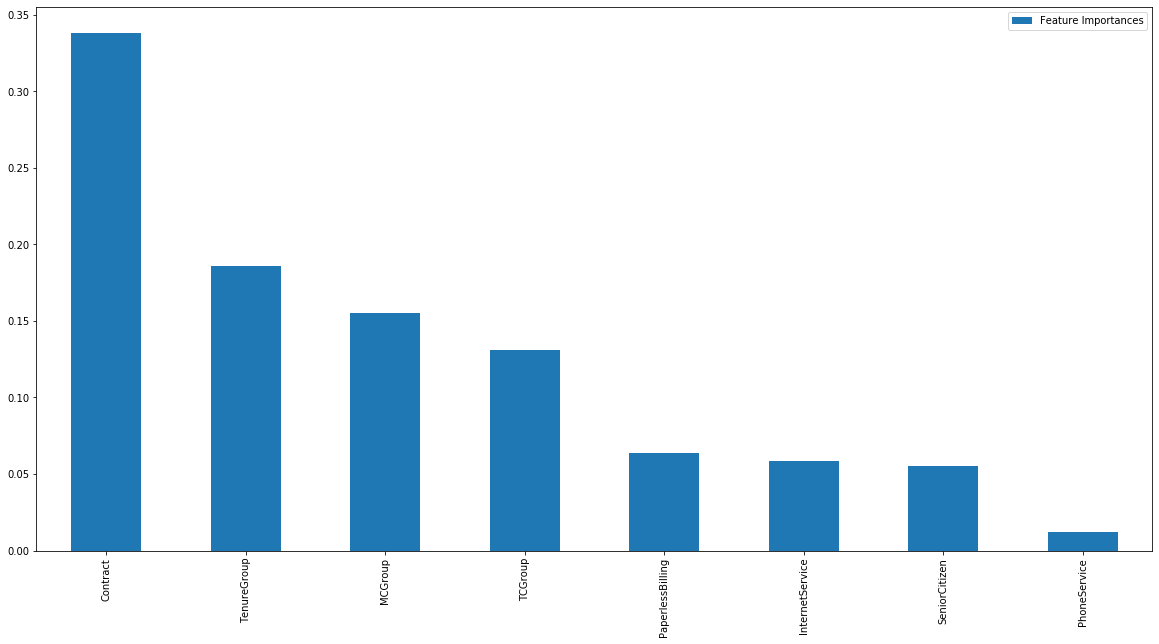

In [75]:
imp.sort_values(by='Feature Importances', ascending= False).plot(kind='bar', rot=90,figsize=(20, 10));

Contract and Tenure Group rank the highest because those groups correlate well in determining whether a customer will churn. With contracts, the majority of churned customers represent the month-to-month contract, which correlates well with customer churning. With Tenure Group, the majority of customers rank younger, which correlates well with churning Telco. 

Senior Citizen and Phone Service ranks the lowest because they had a lower than expected number in customer churning.

I indicated those variables in the graphs earlier in the code.





# Conclusion

*Based on your modeling and analysis, what recommendations would you be able to confidently give in order to prevent a customer from churning?*

The recommendations to prevent from a customer from churning are the following: 
- Meet or exceed customer expectations
- Turn weaknesses into strengths
- Offer more discounts for certain services and less tenured customers
- Emphasize on customers' complaints
- Assuming the customer has a good profile, if they are attempting to cancel, we should offer incentives for them to stay at least a few months 
- Improve communication skills with the customer(s)
- Look out for other competition and match or better their competitors' offer for that particular competition

*What you set out to do?*

If the duration of a customer staying with the company, the total and monthly charges paid by the customer, the type of the contract, internet service, phone service, and the preference of paperless billing for the customer and the customer's age would be good indicators of customer churning.

*What you learned along the way?*

I learned that just because customers take advantage of paperless billing and pay electronically can still mean they vote to churn. It's other factors that caused them to churn.

*What conclusions you were able to confidently come to?*

The tenure of the customer, the type of contract and the total/monthly charges of the customer predicts accurately when it comes to customer churning.
